In [1]:
#加载飞桨和相关类库
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

## 加载数据集

In [11]:
# 设置数据读取器，API自动读取MNIST数据训练集
train_dataset = paddle.vision.datasets.MNIST(mode='train')

<Figure size 640x480 with 0 Axes>

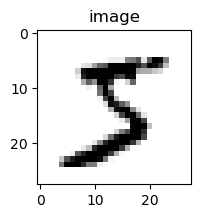

图像数据形状和对应数据为: (28, 28)
图像标签形状和对应数据为: (1,) [5]

打印第一个batch的第一个图像，对应标签数字为[5]


In [3]:
train_data0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])

# 显示第一batch的第一个图像
import matplotlib.pyplot as plt
plt.figure("Image") # 图像窗口名称
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()

print("图像数据形状和对应数据为:", train_data0.shape)
print("图像标签形状和对应数据为:", train_label_0.shape, train_label_0)
print("\n打印第一个batch的第一个图像，对应标签数字为{}".format(train_label_0))

## 设计模型

In [4]:
# 定义mnist数据识别网络结构，同房价预测网络
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        
        # 定义一层全连接层，输出维度是1
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)
        
    # 定义网络结构的前向计算过程
    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

In [5]:
# 声明网络结构
model = MNIST()

def train(model):
    # 启动训练模式
    model.train()
    # 加载训练集 batch_size 设为 16
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'), 
                                        batch_size=16, 
                                        shuffle=True)
    # 定义优化器，使用随机梯度下降SGD优化器，学习率设置为0.001
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())

In [6]:
# 图像归一化函数，将数据范围为[0, 255]的图像归一化到[0, 1]
def norm_img(img):
    # 验证传入数据格式是否正确，img的shape为[batch_size, 28, 28]
    assert len(img.shape) == 3
    batch_size, img_h, img_w = img.shape[0], img.shape[1], img.shape[2]
    # 归一化图像数据
    img = img / 255
    # 将图像形式reshape为[batch_size, 784]
    img = paddle.reshape(img, [batch_size, img_h*img_w])
    
    return img

## 模型训练

In [7]:
import paddle
# 确保从paddle.vision.datasets.MNIST中加载的图像数据是np.ndarray类型
paddle.vision.set_image_backend('cv2')

# 声明网络结构
model = MNIST()

def train(model):
    # 启动训练模式
    model.train()
    # 加载训练集 batch_size 设为 16
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'), 
                                        batch_size=16, 
                                        shuffle=True)
    # 定义优化器，使用随机梯度下降SGD优化器，学习率设置为0.001
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 10
    for epoch in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            images = norm_img(data[0]).astype('float32')
            labels = data[1].astype('float32')
            
            #前向计算的过程
            predicts = model(images)
            
            # 计算损失
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)
            
            #每训练了1000批次的数据，打印下当前Loss的情况
            if batch_id % 1000 == 0:
                print("epoch_id: {}, batch_id: {}, loss is: {}".format(epoch, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()
            
train(model)
paddle.save(model.state_dict(), './mnist.pdparams')b

epoch_id: 0, batch_id: 0, loss is: [42.52945]
epoch_id: 0, batch_id: 1000, loss is: [9.416621]
epoch_id: 0, batch_id: 2000, loss is: [5.0813327]
epoch_id: 0, batch_id: 3000, loss is: [3.4787378]
epoch_id: 1, batch_id: 0, loss is: [2.739934]
epoch_id: 1, batch_id: 1000, loss is: [3.4435124]
epoch_id: 1, batch_id: 2000, loss is: [4.4800997]
epoch_id: 1, batch_id: 3000, loss is: [4.2667866]
epoch_id: 2, batch_id: 0, loss is: [3.0509582]
epoch_id: 2, batch_id: 1000, loss is: [3.4327872]
epoch_id: 2, batch_id: 2000, loss is: [4.6721816]
epoch_id: 2, batch_id: 3000, loss is: [4.318426]
epoch_id: 3, batch_id: 0, loss is: [3.7301369]
epoch_id: 3, batch_id: 1000, loss is: [5.2479696]
epoch_id: 3, batch_id: 2000, loss is: [3.4799845]
epoch_id: 3, batch_id: 3000, loss is: [4.9784575]
epoch_id: 4, batch_id: 0, loss is: [5.883813]
epoch_id: 4, batch_id: 1000, loss is: [3.2607722]
epoch_id: 4, batch_id: 2000, loss is: [4.545308]
epoch_id: 4, batch_id: 3000, loss is: [5.53151]
epoch_id: 5, batch_id: 

## 模型测试

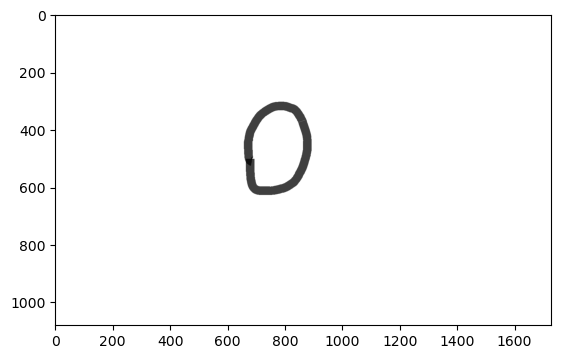

原始图像shape:  (1080, 1728)


C:\Users\WYJ20\AppData\Local\Temp\ipykernel_16632\965987103.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((28, 28), Image.ANTIALIAS)


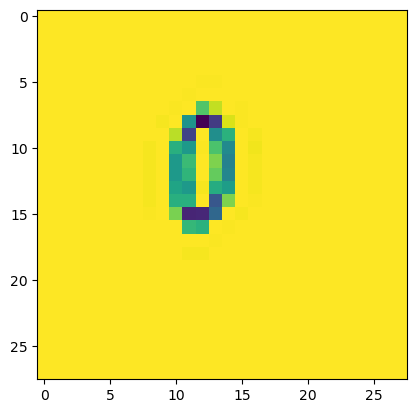

采样后图片shape:  (28, 28)


In [9]:
# 导入图像读取第三方库
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_path = './work_data/example_0.png'
# 读取原始图像并显示
im = Image.open('./work_data/example_0.png')
plt.imshow(im)
plt.show()
# 将原始图像转为灰度图
im = im.convert('L')
print('原始图像shape: ', np.array(im).shape)
# 使用Image.ANTIALIAS方式采样原始图片
im = im.resize((28, 28), Image.ANTIALIAS)
plt.imshow(im)
plt.show()
print("采样后图片shape: ", np.array(im).shape)

In [10]:
# 读取一张本地的样例图片，转变成模型输入的格式
def load_image(img_path):
    # 从img_path中读取图像，并转为灰度图
    im = Image.open(img_path).convert('L')
    # print(np.array(im))
    im = im.resize((28, 28), Image.ANTIALIAS)
    im = np.array(im).reshape(1, -1).astype(np.float32)
    # 图像归一化，保持和数据集的数据范围一致
    im = 1 - im / 255
    return im

# 定义预测过程
model = MNIST()
params_file_path = 'mnist.pdparams'
img_path = './work_data/example_0.png'
# 加载模型参数
param_dict = paddle.load(params_file_path)
model.load_dict(param_dict)
# 灌入数据
model.eval()
tensor_img = load_image(img_path)
result = model(paddle.to_tensor(tensor_img))
print('result',result)
#  预测输出取整，即为预测的数字，打印结果
print("本次预测的数字是", result.numpy().astype('int32'))

result Tensor(shape=[1, 1], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[3.30650854]])
本次预测的数字是 [[3]]


C:\Users\WYJ20\AppData\Local\Temp\ipykernel_16632\780031011.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((28, 28), Image.ANTIALIAS)


# 模型优化

## 数据集优化

In [17]:
import gzip
import json
import random

# 声明数据集文件位置
datafile = './work_data/mnist.json.gz'
print('loading mnist dataset from {} ......'.format(datafile))
# 加载json数据文件
data = json.load(gzip.open(datafile))
print('mnist dataset load done')
# 读取到的数据区分训练集，验证集，测试集
train_set, val_set, eval_set = data

# 观察训练集数据
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))

# 观察验证集数量
imgs, labels = val_set[0], val_set[1]
print("验证数据集数量: ", len(imgs))

# 观察测试集数量
imgs, labels = val= eval_set[0], eval_set[1]
print("测试数据集数量: ", len(imgs))

loading mnist dataset from ./work_data/mnist.json.gz ......
mnist dataset load done
训练数据集数量:  50000
验证数据集数量:  10000
测试数据集数量:  10000


In [18]:
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))
# 获得数据集长度
imgs_length = len(imgs)
# 定义数据集每个数据的序号，根据序号读取数据
index_list = list(range(imgs_length))
# 读入数据时用到的批次大小
BATCHSIZE = 100

# 随机打乱训练数据的索引序号
random.shuffle(index_list)

# 定义数据生成器，返回批次数据
def data_generator():
    imgs_list = []
    labels_list = []
    for i in index_list:
        # 将数据处理成希望的类型
        img = np.array(imgs[i]).astype('float32')
        label = np.array(labels[i]).astype('float32')
        imgs_list.append(img) 
        labels_list.append(label)
        if len(imgs_list) == BATCHSIZE:
            # 获得一个batchsize的数据，并返回
            yield np.array(imgs_list), np.array(labels_list)
            # 清空数据读取列表
            imgs_list = []
            labels_list = []

    # 如果剩余数据的数目小于BATCHSIZE，
    # 则剩余数据一起构成一个大小为len(imgs_list)的mini-batch
    if len(imgs_list) > 0:
        yield np.array(imgs_list), np.array(labels_list)
    return data_generator

训练数据集数量:  50000


In [20]:
# 声明数据读取函数，从训练集中读取数据
train_loader = data_generator
# 以迭代的形式读取数据
for batch_id, data in enumerate(train_loader()):
    image_data, label_data = data
    if batch_id == 0:
        # 打印数据shape和类型
        print("打印第一个batch数据的维度:")
        print("图像维度: {}, 标签维度: {}".format(image_data.shape, label_data.shape))
    break

打印第一个batch数据的维度:
图像维度: (100, 784), 标签维度: (100,)


In [21]:
# 机器校验 如下代码所示，如果数据集中的图片数量和标签数量不等，说明数据逻辑存在问题，可使用assert语句校验图像数量和标签数据是否一致。
imgs_length = len(imgs)

assert len(imgs) == len(labels), \
        "length of train_imgs({}) should be the same as train_labels({})".format(len(imgs), len(labels))

In [22]:
# 人工校验是指打印数据输出结果，观察是否是预期的格式。实现数据处理和加载函数后，我们可以调用它读取一次数据，观察数据的shape和类型是否与函数中设置的一致。
# 声明数据读取函数，从训练集中读取数据
train_loader = data_generator
# 以迭代的形式读取数据
for batch_id, data in enumerate(train_loader()):
    image_data, label_data = data
    if batch_id == 0:
        # 打印数据shape和类型
        print("打印第一个batch数据的维度，以及数据的类型:")
        print("图像维度: {}, 标签维度: {}, 图像数据类型: {}, 标签数据类型: {}".format(image_data.shape, label_data.shape, type(image_data), type(label_data)))
    break

打印第一个batch数据的维度，以及数据的类型:
图像维度: (100, 784), 标签维度: (100,), 图像数据类型: <class 'numpy.ndarray'>, 标签数据类型: <class 'numpy.ndarray'>


In [25]:
# 封装数据读取与处理函数
def load_data(mode='train'):
    datafile = './work_data/mnist.json.gz'
    print('loading mnist dataset from {} ......'.format(datafile))
    # 加载json数据文件
    data = json.load(gzip.open(datafile))
    print('mnist dataset load done')
   
    # 读取到的数据区分训练集，验证集，测试集
    train_set, val_set, eval_set = data
    if mode=='train':
        # 获得训练数据集
        imgs, labels = train_set[0], train_set[1]
    elif mode=='valid':
        # 获得验证数据集
        imgs, labels = val_set[0], val_set[1]
    elif mode=='eval':
        # 获得测试数据集
        imgs, labels = eval_set[0], eval_set[1]
    else:
        raise Exception("mode can only be one of ['train', 'valid', 'eval']")
    print("训练数据集数量: ", len(imgs))
    
    # 校验数据
    imgs_length = len(imgs)

    assert len(imgs) == len(labels), \
          "length of train_imgs({}) should be the same as train_labels({})".format(len(imgs), len(labels))
    
    # 获得数据集长度
    imgs_length = len(imgs)
    
    # 定义数据集每个数据的序号，根据序号读取数据
    index_list = list(range(imgs_length))
    # 读入数据时用到的批次大小
    BATCHSIZE = 100
    
    # 定义数据生成器
    def data_generator():
        if mode == 'train':
            # 训练模式下打乱数据
            random.shuffle(index_list)
        imgs_list = []
        labels_list = []
        for i in index_list:
            # 将数据处理成希望的类型
            img = np.array(imgs[i]).astype('float32')
            label = np.array(labels[i]).astype('float32')
            imgs_list.append(img) 
            labels_list.append(label)
            if len(imgs_list) == BATCHSIZE:
                # 获得一个batchsize的数据，并返回
                yield np.array(imgs_list), np.array(labels_list)
                # 清空数据读取列表
                imgs_list = []
                labels_list = []
    
        # 如果剩余数据的数目小于BATCHSIZE，
        # 则剩余数据一起构成一个大小为len(imgs_list)的mini-batch
        if len(imgs_list) > 0:
            yield np.array(imgs_list), np.array(labels_list)
    return data_generator

In [26]:
#数据处理部分之后的代码，数据读取的部分调用Load_data函数
# 定义网络结构，同上一节所使用的网络结构
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        # 定义一层全连接层，输出维度是1
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)

    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

# 训练配置，并启动训练过程
def train(model):
    model = MNIST()
    model.train()
    #调用加载数据的函数
    train_loader = load_data('train')
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 10
    for epoch_id in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            #准备数据，变得更加简洁
            images, labels = data
            images = paddle.to_tensor(images)
            labels = paddle.to_tensor(labels) 

            #前向计算的过程
            predits = model(images)
            
            #计算损失，取一个批次样本损失的平均值
            loss = F.square_error_cost(predits, labels)
            avg_loss = paddle.mean(loss)      
            
            #每训练了200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    # 保存模型
    paddle.save(model.state_dict(), './mnist.pdparams')
# 创建模型           
model = MNIST()
# 启动训练过程
train(model)

loading mnist dataset from ./work_data/mnist.json.gz ......
mnist dataset load done
训练数据集数量:  50000
epoch: 0, batch: 0, loss is: [23.550531]
epoch: 0, batch: 200, loss is: [10.36849]
epoch: 0, batch: 400, loss is: [9.123628]
epoch: 1, batch: 0, loss is: [10.812381]
epoch: 1, batch: 200, loss is: [9.938552]
epoch: 1, batch: 400, loss is: [8.952712]
epoch: 2, batch: 0, loss is: [10.085693]
epoch: 2, batch: 200, loss is: [8.436949]
epoch: 2, batch: 400, loss is: [8.86948]
epoch: 3, batch: 0, loss is: [9.179923]
epoch: 3, batch: 200, loss is: [9.345951]
epoch: 3, batch: 400, loss is: [8.471709]
epoch: 4, batch: 0, loss is: [9.182866]
epoch: 4, batch: 200, loss is: [8.14891]
epoch: 4, batch: 400, loss is: [8.104611]
epoch: 5, batch: 0, loss is: [8.462081]
epoch: 5, batch: 200, loss is: [8.885427]
epoch: 5, batch: 400, loss is: [8.924889]
epoch: 6, batch: 0, loss is: [8.578644]
epoch: 6, batch: 200, loss is: [7.5805454]
epoch: 6, batch: 400, loss is: [8.53272]
epoch: 7, batch: 0, loss is: [9

In [27]:
#使用飞桨实现异步数据读取非常简单，只需要两个步骤：

#构建一个继承paddle.io.Dataset类的数据读取器。
#通过paddle.io.DataLoader创建异步数据读取的迭代器。

import numpy as np
from paddle.io import Dataset
# 构建一个类，继承paddle.io.Dataset，创建数据读取器
class RandomDataset(Dataset):
    def __init__(self, num_samples):
        # 样本数量
        self.num_samples = num_samples

    def __getitem__(self, idx):
        # 随机产生数据和label
        image = np.random.random([784]).astype('float32')
        label = np.random.randint(0, 9, (1, )).astype('float32')
        return image, label

    def __len__(self):
        # 返回样本总数量
        return self.num_samples
        
# 测试数据读取器
dataset = RandomDataset(10)
for i in range(len(dataset)):
    print(dataset[i])

(array([0.11460443, 0.9242683 , 0.27045628, 0.48871088, 0.31618333,
       0.27351025, 0.5153886 , 0.812733  , 0.41801342, 0.30696616,
       0.35501325, 0.07806926, 0.82666695, 0.9941224 , 0.5624341 ,
       0.2905983 , 0.64030695, 0.08721324, 0.7969697 , 0.60753375,
       0.26704672, 0.48454794, 0.87381816, 0.19288479, 0.49099556,
       0.9826569 , 0.4861755 , 0.71943146, 0.75259274, 0.45636702,
       0.51399994, 0.09556536, 0.04469958, 0.563529  , 0.46363616,
       0.10323086, 0.08406484, 0.8721634 , 0.75156546, 0.01958951,
       0.98942006, 0.03699007, 0.16974351, 0.8534819 , 0.08576021,
       0.4029597 , 0.3191894 , 0.89371586, 0.5244072 , 0.8029105 ,
       0.40172538, 0.94401443, 0.496473  , 0.14903264, 0.84608793,
       0.4244896 , 0.6265818 , 0.37172008, 0.10864783, 0.10731239,
       0.5045317 , 0.80489814, 0.48011652, 0.75913364, 0.58643323,
       0.23633794, 0.55367935, 0.62754303, 0.30269536, 0.49834722,
       0.83976376, 0.07863548, 0.346612  , 0.09765993, 0.5697

In [28]:
loader = paddle.io.DataLoader(dataset, batch_size=3, shuffle=True, drop_last=True, num_workers=2)
for i, data in enumerate(loader()):
    images, labels = data[0], data[1]
    print("batch_id: {}, 训练数据shape: {}, 标签数据shape: {}".format(i, images.shape, labels.shape))

batch_id: 0, 训练数据shape: [3, 784], 标签数据shape: [3, 1]
batch_id: 1, 训练数据shape: [3, 784], 标签数据shape: [3, 1]
batch_id: 2, 训练数据shape: [3, 784], 标签数据shape: [3, 1]


C:\Users\WYJ20\AppData\Roaming\Python\Python311\site-packages\paddle\io\reader.py:433: UserWarning: DataLoader with multi-process mode is not supported on MacOs and Windows currently. Please use signle-process mode with num_workers = 0 instead
  warnings.warn(


In [30]:
import paddle
import json
import gzip
import numpy as np

# 创建一个类MnistDataset，继承paddle.io.Dataset 这个类
# MnistDataset的作用和上面load_data()函数的作用相同，均是构建一个迭代器
class MnistDataset(paddle.io.Dataset):
    def __init__(self, mode):
        datafile = './work_data/mnist.json.gz'
        data = json.load(gzip.open(datafile))
        # 读取到的数据区分训练集，验证集，测试集
        train_set, val_set, eval_set = data
        if mode=='train':
            # 获得训练数据集
            imgs, labels = train_set[0], train_set[1]
        elif mode=='valid':
            # 获得验证数据集
            imgs, labels = val_set[0], val_set[1]
        elif mode=='eval':
            # 获得测试数据集
            imgs, labels = eval_set[0], eval_set[1]
        else:
            raise Exception("mode can only be one of ['train', 'valid', 'eval']")
        
        # 校验数据
        imgs_length = len(imgs)
        assert len(imgs) == len(labels), \
            "length of train_imgs({}) should be the same as train_labels({})".format(len(imgs), len(labels))
        
        self.imgs = imgs
        self.labels = labels

    def __getitem__(self, idx):
        img = np.array(self.imgs[idx]).astype('float32')
        label = np.array(self.labels[idx]).astype('float32')
        
        return img, label

    def __len__(self):
        return len(self.imgs)

In [31]:
# 声明数据加载函数，使用训练模式，MnistDataset构建的迭代器每次迭代只返回batch=1的数据
train_dataset = MnistDataset(mode='train')
# 使用paddle.io.DataLoader 定义DataLoader对象用于加载Python生成器产生的数据，
# DataLoader 返回的是一个批次数据迭代器，并且是异步的；
data_loader = paddle.io.DataLoader(train_dataset, batch_size=100, shuffle=True)
# 迭代的读取数据并打印数据的形状
for i, data in enumerate(data_loader()):
    images, labels = data
    print(i, images.shape, labels.shape)
    if i>=2:
        break

0 [100, 784] [100]
1 [100, 784] [100]
2 [100, 784] [100]


In [32]:
# 异步数据读取并训练的完整案例代码如下所示

def train(model):
    model = MNIST()
    model.train()
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 3
    for epoch_id in range(EPOCH_NUM):
        for batch_id, data in enumerate(data_loader()):
            images, labels = data
            images = paddle.to_tensor(images)
            labels = paddle.to_tensor(labels).astype('float32')
            
            #前向计算的过程  
            predicts = model(images)

            #计算损失，取一个批次样本损失的平均值
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)       
            
            #每训练了200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    #保存模型参数
    paddle.save(model.state_dict(), 'mnist')

#创建模型
model = MNIST()
#启动训练过程
train(model)

epoch: 0, batch: 0, loss is: [26.319187]
epoch: 0, batch: 200, loss is: [10.051813]
epoch: 0, batch: 400, loss is: [10.017684]
epoch: 1, batch: 0, loss is: [10.0508175]
epoch: 1, batch: 200, loss is: [8.107683]
epoch: 1, batch: 400, loss is: [9.771015]
epoch: 2, batch: 0, loss is: [10.200038]
epoch: 2, batch: 200, loss is: [9.83734]
epoch: 2, batch: 400, loss is: [8.906218]


## 网络结构

In [34]:
#数据处理部分之前的代码，保持不变
import os
import random
import paddle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import gzip
import json

# 定义数据集读取器
def load_data(mode='train'):

    # 加载数据
    datafile = './work_data/mnist.json.gz'
    print('loading mnist dataset from {} ......'.format(datafile))
    data = json.load(gzip.open(datafile))
    print('mnist dataset load done')

    # 读取到的数据区分训练集，验证集，测试集
    train_set, val_set, eval_set = data

    # 数据集相关参数，图片高度IMG_ROWS, 图片宽度IMG_COLS
    IMG_ROWS = 28
    IMG_COLS = 28

    if mode == 'train':
        # 获得训练数据集
        imgs, labels = train_set[0], train_set[1]
    elif mode == 'valid':
        # 获得验证数据集
        imgs, labels = val_set[0], val_set[1]
    elif mode == 'eval':
        # 获得测试数据集
        imgs, labels = eval_set[0], eval_set[1]
    else:
        raise Exception("mode can only be one of ['train', 'valid', 'eval']")

    #校验数据
    imgs_length = len(imgs)
    assert len(imgs) == len(labels), \
          "length of train_imgs({}) should be the same as train_labels({})".format(
                  len(imgs), len(labels))

    # 定义数据集每个数据的序号， 根据序号读取数据
    index_list = list(range(imgs_length))
    # 读入数据时用到的batchsize
    BATCHSIZE = 100
    
    # 定义数据生成器
    def data_generator():
        if mode == 'train':
            random.shuffle(index_list)
        imgs_list = []
        labels_list = []
        for i in index_list:
            img = np.array(imgs[i]).astype('float32')
            label = np.array(labels[i]).astype('float32')
            # 在使用卷积神经网络结构时，uncomment 下面两行代码
            img = np.reshape(imgs[i], [1, IMG_ROWS, IMG_COLS]).astype('float32')
            label = np.reshape(labels[i], [1]).astype('float32')
            imgs_list.append(img) 
            labels_list.append(label)
            if len(imgs_list) == BATCHSIZE:
                yield np.array(imgs_list), np.array(labels_list)
                imgs_list = []
                labels_list = []

        # 如果剩余数据的数目小于BATCHSIZE，
        # 则剩余数据一起构成一个大小为len(imgs_list)的mini-batch
        if len(imgs_list) > 0:
            yield np.array(imgs_list), np.array(labels_list)

    return data_generator

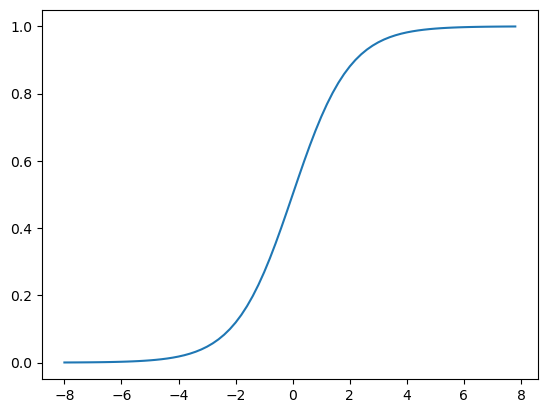

In [35]:
def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))
 
# param:起点，终点，间距
x = np.arange(-8, 8, 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [36]:
import paddle.nn.functional as F
from paddle.nn import Linear

# 定义多层全连接神经网络
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        # 定义两层全连接隐含层，输出维度是10，当前设定隐含节点数为10，可根据任务调整
        self.fc1 = Linear(in_features=784, out_features=10)
        self.fc2 = Linear(in_features=10, out_features=10)
        # 定义一层全连接输出层，输出维度是1
        self.fc3 = Linear(in_features=10, out_features=1)
    
    # 定义网络的前向计算，隐含层激活函数为sigmoid，输出层不使用激活函数
    def forward(self, inputs):
        # inputs = paddle.reshape(inputs, [inputs.shape[0], 784])
        outputs1 = self.fc1(inputs)
        outputs1 = F.sigmoid(outputs1)
        outputs2 = self.fc2(outputs1)
        outputs2 = F.sigmoid(outputs2)
        outputs_final = self.fc3(outputs2)
        return outputs_final

In [37]:
# 定义 SimpleNet 网络结构
import paddle
from paddle.nn import Conv2D, MaxPool2D, Linear
import paddle.nn.functional as F
# 多层卷积神经网络实现
class MNIST(paddle.nn.Layer):
     def __init__(self):
         super(MNIST, self).__init__()
         
         # 定义卷积层，输出特征通道out_channels设置为20，卷积核的大小kernel_size为5，卷积步长stride=1，padding=2
         self.conv1 = Conv2D(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=2)
         # 定义池化层，池化核的大小kernel_size为2，池化步长为2
         self.max_pool1 = MaxPool2D(kernel_size=2, stride=2)
         # 定义卷积层，输出特征通道out_channels设置为20，卷积核的大小kernel_size为5，卷积步长stride=1，padding=2
         self.conv2 = Conv2D(in_channels=20, out_channels=20, kernel_size=5, stride=1, padding=2)
         # 定义池化层，池化核的大小kernel_size为2，池化步长为2
         self.max_pool2 = MaxPool2D(kernel_size=2, stride=2)
         # 定义一层全连接层，输出维度是1
         self.fc = Linear(in_features=980, out_features=1)
         
    # 定义网络前向计算过程，卷积后紧接着使用池化层，最后使用全连接层计算最终输出
    # 卷积层激活函数使用Relu，全连接层不使用激活函数
     def forward(self, inputs):
         x = self.conv1(inputs)
         x = F.relu(x)
         x = self.max_pool1(x)
         x = self.conv2(x)
         x = F.relu(x)
         x = self.max_pool2(x)
         x = paddle.reshape(x, [x.shape[0], -1])
         x = self.fc(x)
         return x

In [38]:
#网络结构部分之后的代码，保持不变
def train(model):
    model.train()
    #调用加载数据的函数，获得MNIST训练数据集
    train_loader = load_data('train')
    # 使用SGD优化器，learning_rate设置为0.01
    opt = paddle.optimizer.SGD(learning_rate=0.01, parameters=model.parameters())
    # 训练5轮
    EPOCH_NUM = 2
    # MNIST图像高和宽
    IMG_ROWS, IMG_COLS = 28, 28

    for epoch_id in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            #准备数据
            images, labels = data
            images = paddle.to_tensor(images)
            # 在使用卷积神经网络结构时，uncomment 下面一行代码
            images = paddle.reshape(images, [images.shape[0],1,IMG_ROWS,IMG_COLS])
            labels = paddle.to_tensor(labels)
            
            #前向计算的过程
            predicts = model(images)
            
            #计算损失，取一个批次样本损失的平均值
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)

            #每训练200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            # 最小化loss,更新参数
            opt.step()
            # 清除梯度
            opt.clear_grad()

    #保存模型参数
    paddle.save(model.state_dict(), 'mnist.pdparams')

model = MNIST()
train(model)

loading mnist dataset from ./work_data/mnist.json.gz ......
mnist dataset load done
epoch: 0, batch: 0, loss is: [38.370758]
epoch: 0, batch: 200, loss is: [3.2743475]
epoch: 0, batch: 400, loss is: [2.7978003]
epoch: 1, batch: 0, loss is: [2.6469736]
epoch: 1, batch: 200, loss is: [2.4772873]
epoch: 1, batch: 400, loss is: [4.3851027]
